In [1]:
import pygrib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
def extract_data(filename):
    with pygrib.open(filename) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        return data.flatten()

In [3]:
X = extract_data('twelve-hour')
y = extract_data('zero-hour')

In [4]:
# Reshape X to meet sklearn requirements
X = X.reshape(-1, 1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create a linear regression object
regr = LinearRegression()

In [7]:
# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [9]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [1.00059261]


In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(data, lats, lons):
    # Create a map plot using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, cmap='coolwarm')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Geopotential Height (gpm)')

    # Set plot title and labels
    plt.title('Predicted Geopotential Height at 500 hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()




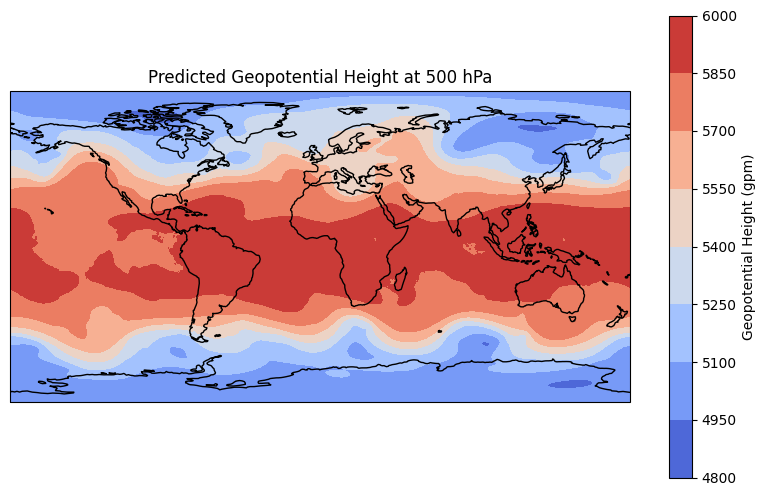

In [11]:
import pandas as pd
import numpy as np

# Function to get data and lat/lon from new GRIB file
def extract_data_and_coords(filename):
    with pygrib.open(filename) as grbs:
        grb = grbs.select()[0]
        data = grb.values
        lats, lons = grb.latlons()
        return data.flatten(), lats, lons

# Extract data and coordinates from new GRIB file
X_new, lats, lons = extract_data_and_coords('new-twelve')

# Reshape X_new to meet sklearn requirements
X_new = X_new.reshape(-1, 1)

# Make predictions using the new data
y_new_pred = regr.predict(X_new)

# Save predictions to a CSV file
pd.DataFrame(y_new_pred).to_csv('predictions.csv', index=False)

# Reshape predicted data back to original dimensions for plotting
y_new_pred = y_new_pred.reshape(361, 720)

# Plot the predicted geopotential height
plot_geopotential_height(y_new_pred, lats, lons)


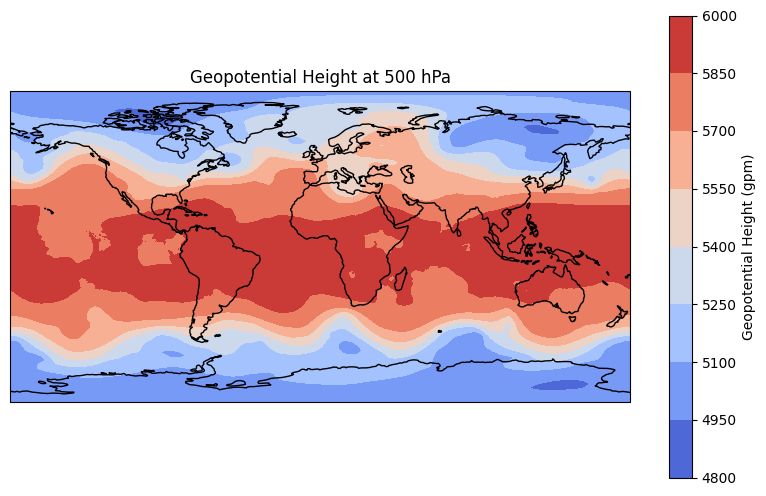

In [12]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def plot_geopotential_height(file_path):
    grbs = pygrib.open(file_path)
    grb = grbs.select(name='Geopotential Height')[0]  # Assuming Geopotential Height is the variable of interest

    data = grb.values
    lats, lons = grb.latlons()

    # Create a map plot using Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the geopotential height data
    plt.contourf(lons, lats, data, cmap='coolwarm')

    # Add colorbar
    cbar = plt.colorbar()
    cbar.set_label('Geopotential Height (gpm)')

    # Set plot title and labels
    plt.title('Geopotential Height at 500 hPa')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.show()

# Specify the file path of your GRIB file
grib_file = "new-zero"

# Plot geopotential height on a map
plot_geopotential_height(grib_file)

In [13]:
from joblib import dump

# Save the model to a file
dump(regr, 'regr_model.joblib') 


['regr_model.joblib']

In [17]:
import os
print(os.listdir(os.getcwd()))

['Data-Visualizing.ipynb', 'zero-hour', 'new-zero', 'Model-Training.ipynb', 'twelve-hour', 'new-twelve', 'regr_model.joblib', '.ipynb_checkpoints', 'predictions.csv']


In [18]:
print(os.getcwd())

/home/data/detectives/testing
